In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [50]:
df=pd.read_csv("insurance.csv")

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.shape

(1338, 7)

In [53]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [56]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [57]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [58]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

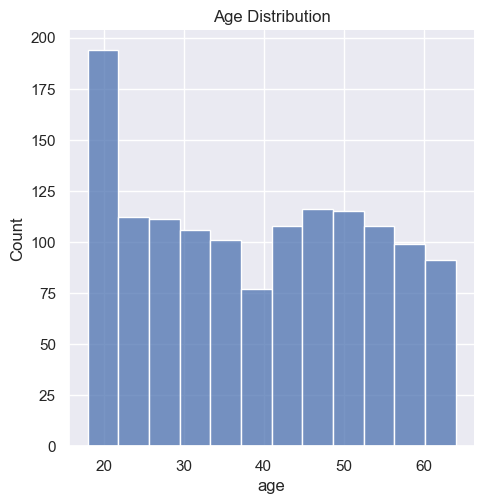

In [59]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

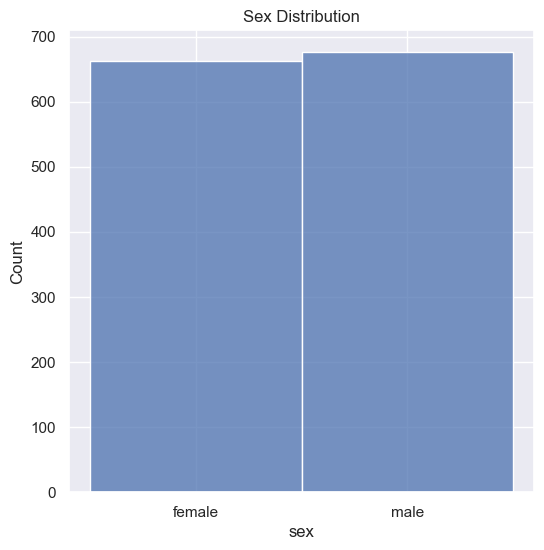

In [60]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['sex'])
plt.title('Sex Distribution')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

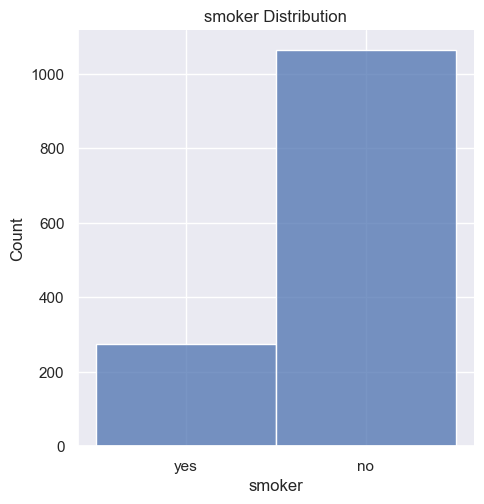

In [61]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['smoker'])
plt.title('smoker Distribution')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

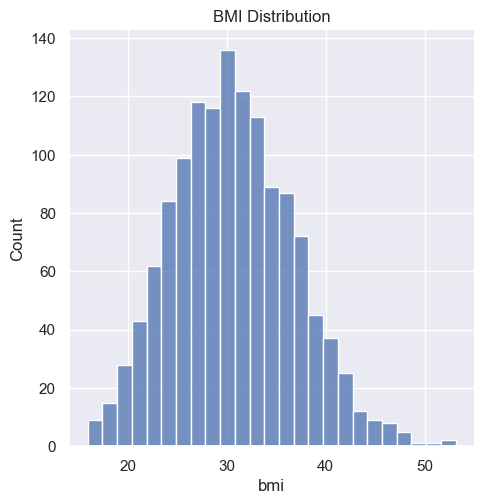

In [62]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

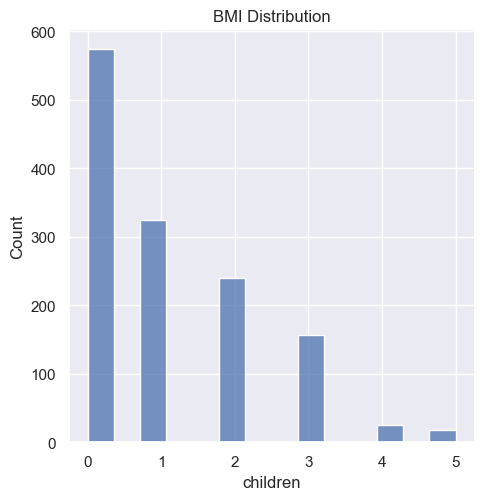

In [63]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['children'])
plt.title('BMI Distribution')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

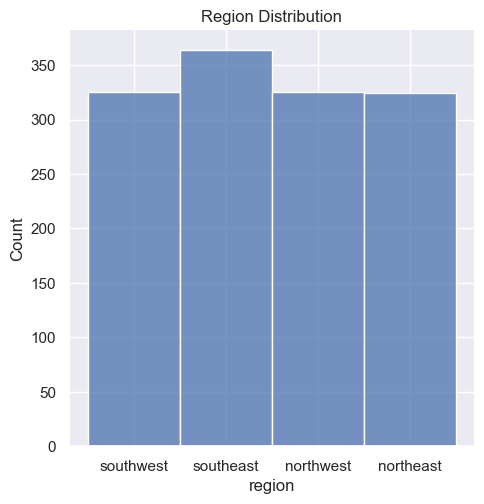

In [64]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['region'])
plt.title('Region Distribution')
plt.show()

In [65]:
df["sex"].replace("female",1,inplace=True)

In [66]:
df["sex"].replace("male",2,inplace=True)

In [67]:
df["smoker"].replace("yes",1,inplace=True)
df["smoker"].replace("no",0,inplace=True)

In [68]:
df["region"].replace("southwest",1,inplace=True)
df["region"].replace("southeast",2,inplace=True)
df["region"].replace("northwest",3,inplace=True)
df["region"].replace("northeast",4,inplace=True)

In [69]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,2,22.705,0,0,3,21984.47061
4,32,2,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


{'whiskers': [<matplotlib.lines.Line2D at 0x20283dbd2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20283dbe550>,
 'boxes': [<matplotlib.lines.Line2D at 0x20283dbc890>],
 'medians': [<matplotlib.lines.Line2D at 0x20283dbf690>],
 'fliers': [<matplotlib.lines.Line2D at 0x20283dbe410>],
 'means': []}

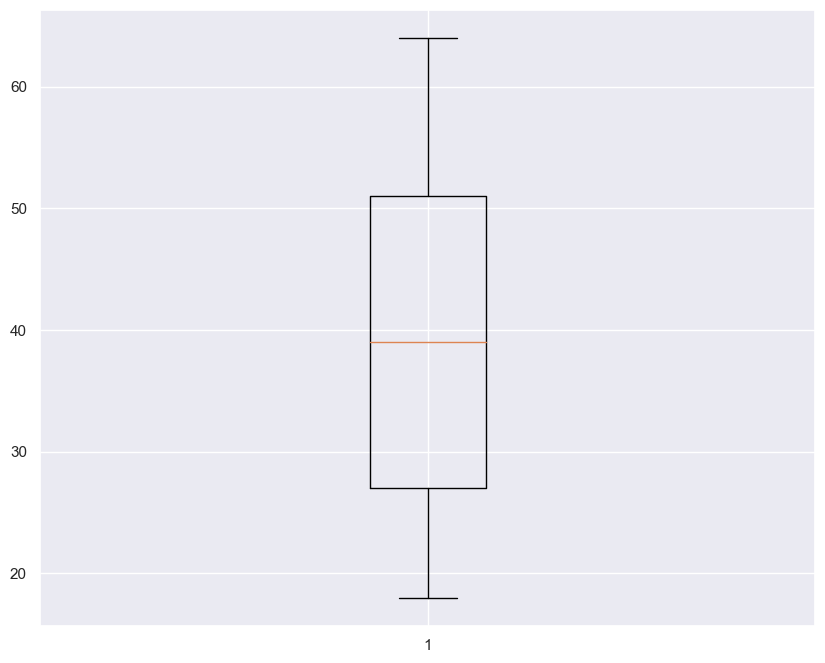

In [70]:
fig=plt.figure(figsize=(10,8))
plt.boxplot(df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20284de2bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20284de3f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20284de22d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20284df4e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20284df5610>],
 'means': []}

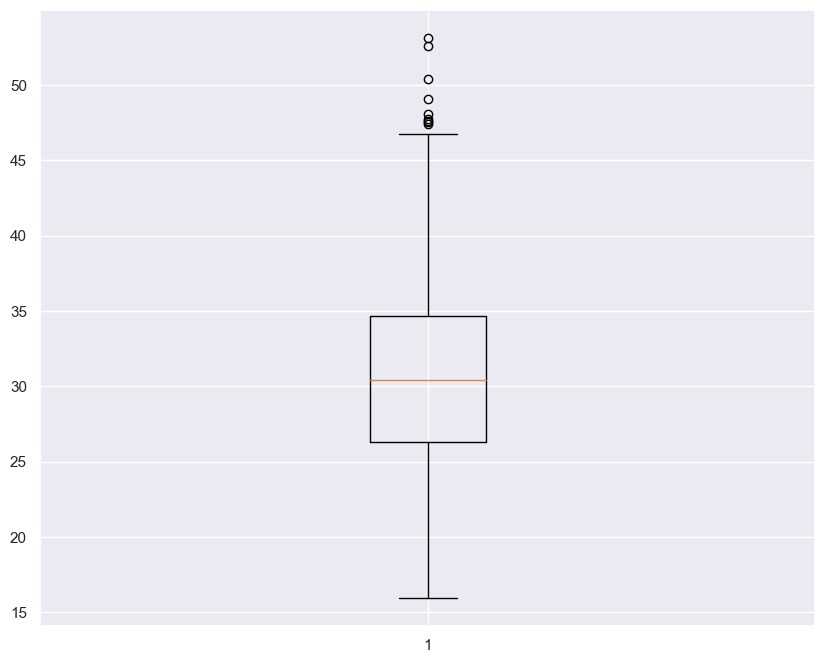

In [71]:
fig=plt.figure(figsize=(10,8))
plt.boxplot(df["bmi"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20284e56cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20284e57ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20284e56190>],
 'medians': [<matplotlib.lines.Line2D at 0x20284e5d110>],
 'fliers': [<matplotlib.lines.Line2D at 0x20284e09a90>],
 'means': []}

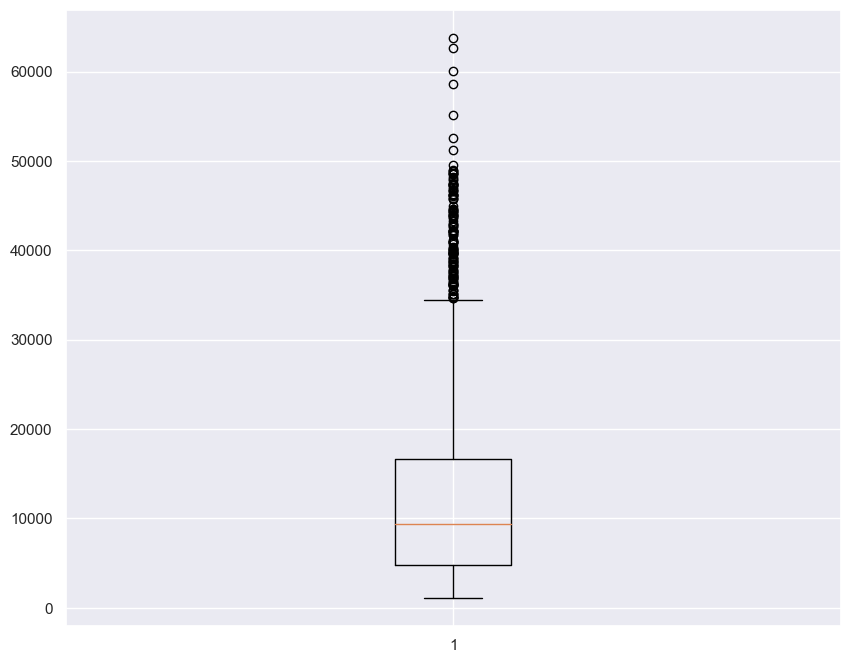

In [72]:
fig=plt.figure(figsize=(10,8))
plt.boxplot(df["charges"])

In [73]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [74]:
#smoker nad charges are possitively correlated

<Axes: >

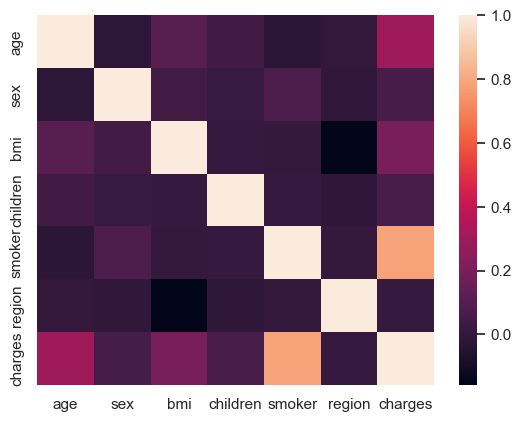

In [75]:
sns.heatmap(df.corr())

In [76]:
X  =df.drop(columns="charges",axis=1)
Y=df["charges"]

In [77]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,2,33.770,1,0,2
2,28,2,33.000,3,0,2
3,33,2,22.705,0,0,3
4,32,2,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,2,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [78]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=2)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((936, 6), (936,), (402, 6), (402,))

In [99]:
scaler=StandardScaler()

In [100]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm=LinearRegression()
lm

LinearRegression()

In [103]:
lm.fit(X_train,Y_train)

LinearRegression()

In [104]:
print(lm.coef_)

[3391.12500309  -65.291065   2094.30191593  744.75876889 9411.49045213
  460.69297846]


In [105]:
print(lm.intercept_)

13259.865125180557


In [106]:
y_pred=lm.predict(X_test)

In [107]:
print(y_pred)

[ 2.02608979e+03  1.20507841e+04  1.04921330e+04  2.49302173e+03
  8.31941250e+03  1.14367049e+04  3.48622203e+03  1.35989419e+03
  1.19520218e+04  9.67206698e+03  1.14503622e+04  5.35763549e+03
  2.95049938e+04 -2.48372597e+02  1.30521770e+04  1.32515720e+04
  4.29597668e+03  8.01020318e+03  2.89698460e+04  3.09798751e+03
  1.23535332e+04  1.91619908e+03  3.35553389e+04  3.17588653e+04
  3.00973589e+04  8.24819529e+03  2.51477781e+03  1.55847964e+04
  6.28365677e+03  2.04819304e+03  9.78710532e+03  5.89204142e+03
  4.01084592e+03  4.90345937e+03  9.73944860e+03  5.04646500e+03
  2.98042637e+04  6.25834976e+03  2.72304583e+04  1.39780589e+04
  3.03013569e+02  2.74321178e+04  7.76323797e+03  1.09412926e+03
  1.05663495e+04  7.71047976e+03  1.14876649e+04  8.48749838e+03
  1.11697412e+04  1.32506430e+04  6.53137086e+03 -1.28626709e+03
  2.58530514e+04  3.64133294e+04  6.90930418e+03  1.76114266e+04
  8.68911311e+02  1.12573402e+04  1.78751865e+03  3.36746463e+04
  1.12557667e+04  3.70257

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
r_squared

0.7648415301644245

In [109]:
df1=pd.DataFrame({"actual":Y_test,"Predicted":y_pred})
df1

,actual,Predicted
17,2395.17155,2026.089786
1091,11286.53870,12050.784098
273,9617.66245,10492.132951
270,1719.43630,2493.021730
874,8891.13950,8319.412496
...,...,...
468,23288.92840,4158.753605
1232,12479.70895,11431.257986
682,40103.89000,33228.937538
86,43578.93940,35935.918239


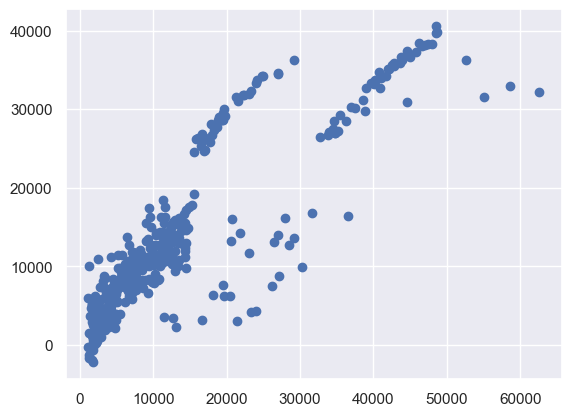

In [110]:
plt.scatter(Y_test,y_pred)

In [111]:
mean_squared_error(Y_test,y_pred)

38010670.32913277

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [113]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [45]:
vif

,VIF,variable
0,8.008088,age
1,8.557449,sex
2,13.354435,bmi
3,1.809445,children
4,1.263049,smoker
5,5.046779,region


In [114]:
df.drop(["bmi"],axis=1,inplace=True)

In [115]:
df.head()

,age,sex,children,smoker,region,charges
0,19,1,0,1,1,16884.92400
1,18,2,1,0,2,1725.55230
2,28,2,3,0,2,4449.46200
3,33,2,0,0,3,21984.47061
4,32,2,0,0,3,3866.85520


In [116]:
X=df.drop(columns="charges",axis=1)
Y=df["charges"]

In [117]:
X

,age,sex,children,smoker,region
0,19,1,0,1,1
1,18,2,1,0,2
2,28,2,3,0,2
3,33,2,0,0,3
4,32,2,0,0,3
...,...,...,...,...,...
1333,50,2,3,0,3
1334,18,1,0,0,4
1335,18,1,0,0,2
1336,21,1,0,0,1


In [118]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=2)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((936, 5), (936,), (402, 5), (402,))

In [122]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [123]:
lm.fit(X_train,Y_train)

LinearRegression()

In [125]:
print(lm.coef_)

[3610.47404194   46.77438906  708.56410459 9417.80328414   69.3850111 ]


In [126]:
print(lm.intercept_)

13259.865125180557


In [127]:
y_pred=lm.predict(X_test)

In [128]:
y_pred

array([ 3715.05754138, 11955.87793729, 11332.26203945,  2872.54483596,
       10939.68877839,  7663.35600239,  4497.90639484,  2319.23887869,
       13976.81223842,  8896.14430021, 12674.56371699,  2778.9746947 ,
       32462.4202959 ,  2287.48235363, 10717.79248962, 14136.04519404,
        5538.20547138,  6812.54666592, 30993.29221144,  2319.23887869,
       12414.1140127 ,  3497.6604744 , 32882.1029558 , 32002.68447988,
       27867.89576   , 12121.90778336,  4142.38680869, 11335.26152065,
        5060.35870012,  4340.17317982,  7402.9062981 ,  5185.68536644,
        6687.2199996 ,  6321.05432484, 11724.03737245,  2193.91221237,
       25562.40183693,  7173.36340191, 27343.99687023, 14332.33182457,
        2517.02524982, 27156.00687075,  9028.26785698,  2912.59799207,
        8769.31789329,  7208.11940817, 12179.27396667,  5737.49158311,
        6583.00376973, 11861.45807907,  5859.02084018,  2485.26872476,
       25885.51487438, 35615.72407424,  8446.20485585, 12677.56319819,
      

In [144]:
mse=mean_squared_error(Y_test,y_pred)
r_squared = r2_score(Y_test,y_pred)
r_squared

0.7439905900389983

In [130]:
df2=pd.DataFrame({'actual':Y_test,"Predicted":y_pred})
df2

,actual,Predicted
17,2395.17155,3715.057541
1091,11286.53870,11955.877937
273,9617.66245,11332.262039
270,1719.43630,2872.544836
874,8891.13950,10939.688778
...,...,...
468,23288.92840,5508.798404
1232,12479.70895,13387.952347
682,40103.89000,32232.877400
86,43578.93940,35782.603637


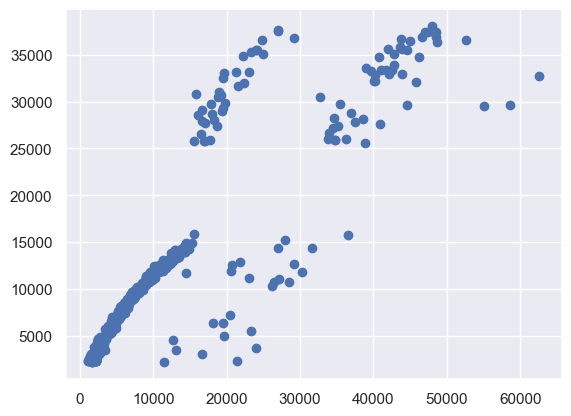

In [131]:
plt.scatter(Y_test,y_pred)

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))
print(np.sqrt(mean_squared_error(Y_test,y_pred)))

41380985.72416927
4061.8021267768418
6432.805431860136


In [151]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)

0.7439905900389983


In [154]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7407581479940362

In [132]:
#now will treat outliers to train linear regression model

In [134]:
df.describe()

,age,sex,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.505232,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,1.205493,0.403694,1.104885,12110.011237
min,18.000000,1.000000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,2.000000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,5.000000,1.000000,4.000000,63770.428010


{'whiskers': [<matplotlib.lines.Line2D at 0x2028071b050>,
 'caps': [<matplotlib.lines.Line2D at 0x20283d56e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x202807deb50>],
 'medians': [<matplotlib.lines.Line2D at 0x20281a4b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20281a4bf50>],
 'means': []}

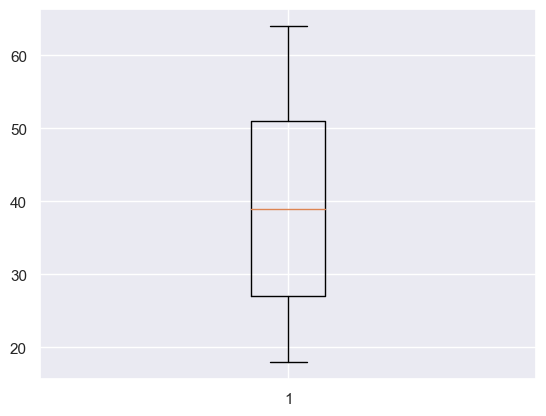

In [135]:
plt.boxplot(df["age"])

In [136]:
#no outlier in age column

{'whiskers': [<matplotlib.lines.Line2D at 0x20280835e90>,
 'caps': [<matplotlib.lines.Line2D at 0x202807d2110>,
 'boxes': [<matplotlib.lines.Line2D at 0x202807cc850>],
 'medians': [<matplotlib.lines.Line2D at 0x202807d3b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x202807a7ad0>],
 'means': []}

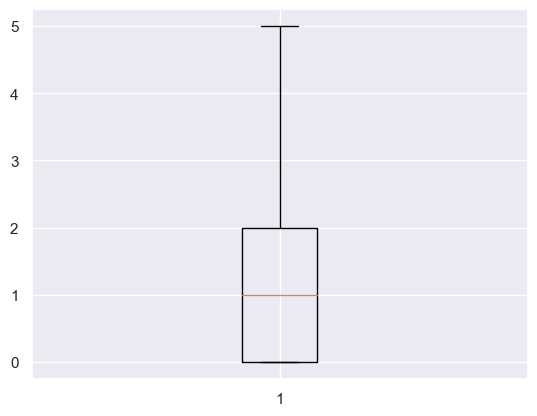

In [137]:
plt.boxplot(df["children"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20280836d10>,
 'caps': [<matplotlib.lines.Line2D at 0x20280800210>,
 'boxes': [<matplotlib.lines.Line2D at 0x202807c6010>],
 'medians': [<matplotlib.lines.Line2D at 0x20280801e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20280802910>],
 'means': []}

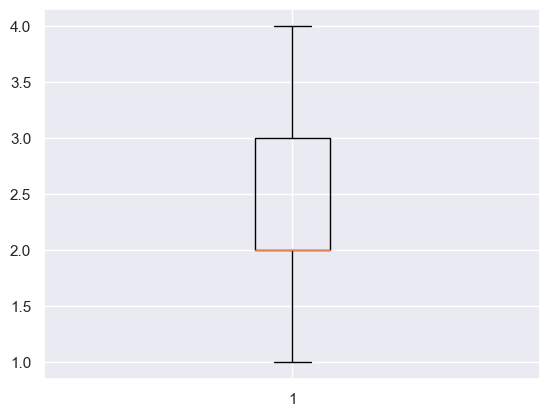

In [139]:
plt.boxplot(df["region"])

{'whiskers': [<matplotlib.lines.Line2D at 0x202808a5790>,
 'caps': [<matplotlib.lines.Line2D at 0x202808a6e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x202808a4bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x202808a8390>],
 'fliers': [<matplotlib.lines.Line2D at 0x20280867510>],
 'means': []}

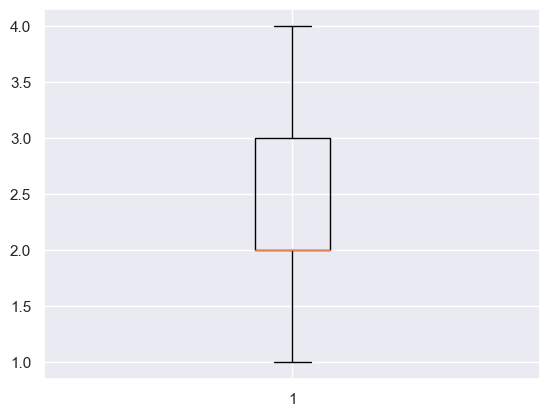

In [140]:
plt.boxplot(df["region"])

In [155]:
from sklearn.linear_model import Ridge

In [156]:
ridge=Ridge()

In [157]:
ridge.fit(X_train,Y_train)

Ridge()

In [158]:
print(ridge.coef_)

[3606.23535557   47.35969916  708.00994887 9407.54489879   69.51821682]


In [159]:
print(ridge.intercept_)

13259.865125180557


In [162]:
ridge_pred=ridge.predict(X_test)

In [163]:
ridge_pred

array([ 3726.5231819 , 11956.38813922, 11335.01439778,  2884.84114253,
       10943.36060558,  7668.51787703,  4508.4883995 ,  2331.06246777,
       13974.75600118,  8900.51134179, 12674.03631585,  2790.10011374,
       32440.90703452,  2300.23622743, 10719.98549485, 14135.34747735,
        5547.53074136,  6819.35984526, 30974.78444092,  2331.06246777,
       12413.89237879,  3507.74829037, 32861.64244775, 31981.86938856,
       27853.05719613, 12122.92220139,  4152.07002723, 11338.08121058,
        5068.61191277,  4349.43032973,  7408.37393996,  5194.1791819 ,
        6693.79257613,  6329.49595896, 11726.85922958,  2205.49519864,
       25548.53058887,  7180.18739713, 27329.70250919, 14331.17437345,
        2528.42277027, 27141.3516055 ,  9032.02119693,  2923.14337527,
        8773.41066626,  7214.08045026, 12181.29665635,  5746.42445026,
        6591.17330243, 11862.77826432,  5869.11594619,  2497.59652994,
       25871.4581605 , 35591.52486075,  8450.48309463, 12677.10312865,
      

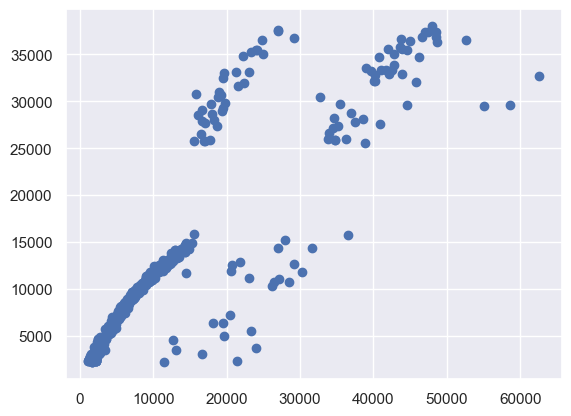

In [164]:
plt.scatter(Y_test,ridge_pred)

In [165]:
residuals=Y_test-ridge_pred

In [166]:
residuals

17      -1331.351632
1091     -669.849439
273     -1717.351948
270     -1165.404843
874     -2052.221106
            ...     
468     17771.821646
1232     -907.566363
682      7891.169508
86       7822.011631
164     -2277.608066
Name: charges, Length: 402, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


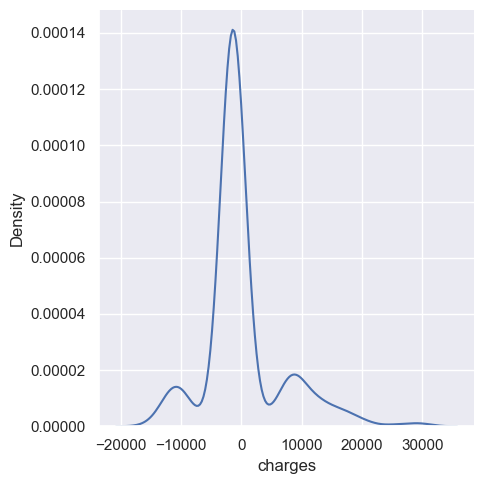

In [167]:
sns.displot(residuals,kind="kde")

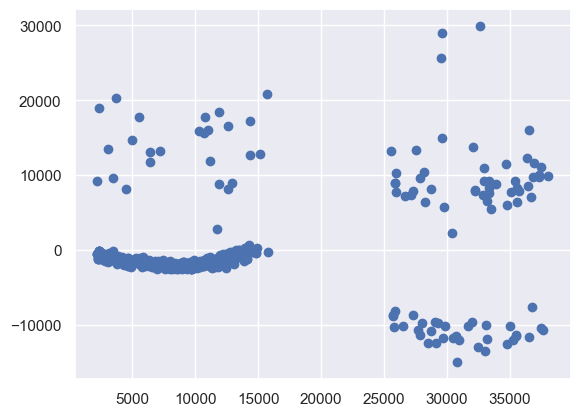

In [168]:
plt.scatter(ridge_pred,residuals)

In [169]:
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

41398011.51150371
4066.3254131439503
6434.128652078983


In [171]:
score_ridge=r2_score(Y_test,ridge_pred)

In [172]:
score_ridge

0.7438852575609691

In [173]:
1-(1-score_ridge)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7406514855604763

In [174]:
from sklearn.linear_model import Lasso

In [175]:
lasso=Lasso()

In [176]:
lasso

Lasso()

In [177]:
lasso.fit(X_train,Y_train)

Lasso()

In [178]:
print(lasso.coef_)
print(lasso.intercept_)

[3609.4456201    45.82070481  707.58247077 9416.85754487   68.42603254]
13259.865125180557


In [179]:
lasso_pred=lasso.predict(X_test)

In [180]:
lasso_pred

array([ 3715.40893575, 11955.76313466, 11329.79983385,  2874.18878632,
       10936.05062486,  7666.16035518,  4498.23914255,  2321.86901479,
       13976.97001297,  8896.46150242, 12675.0924292 ,  2782.52644913,
       32461.18271568,  2289.93684055, 10717.38646315, 14133.83691896,
        5538.03755302,  6813.4573684 , 30990.59195235,  2321.86901479,
       12414.71691245,  3501.85574367, 32878.42513842, 32000.52528135,
       27866.08575131, 12122.40922146,  4144.49763207, 11333.20714693,
        5064.10884419,  4343.0758931 ,  7405.78483843,  5187.70335562,
        6689.86285697,  6320.86775982, 11720.58448821,  2198.27450336,
       25564.41745558,  7175.27440315, 27341.92740472, 14330.71152345,
        2520.44727583, 27156.53563757,  9029.83519466,  2917.60379791,
        8771.16333445,  7210.61389048, 12176.13095291,  5738.3194706 ,
        6582.94693312, 11862.0337047 ,  5855.54211431,  2488.51510159,
       25886.59022805, 35612.1466851 ,  8448.99056198, 12678.49974229,
      

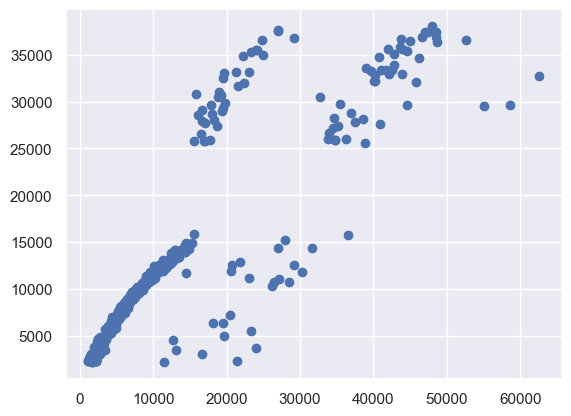

In [181]:
plt.scatter(Y_test,lasso_pred)

In [182]:
residuals_lasso=Y_test-lasso_pred

In [183]:
residuals

17      -1331.351632
1091     -669.849439
273     -1717.351948
270     -1165.404843
874     -2052.221106
            ...     
468     17771.821646
1232     -907.566363
682      7891.169508
86       7822.011631
164     -2277.608066
Name: charges, Length: 402, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


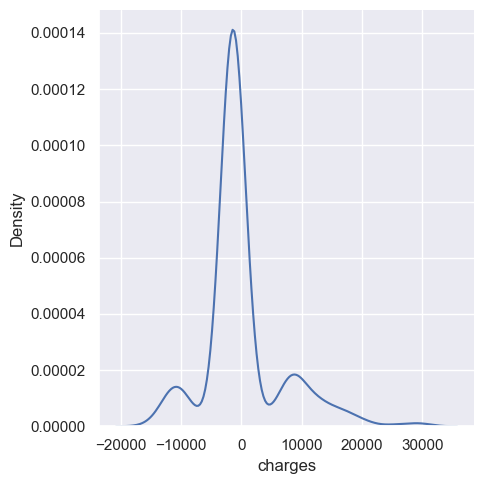

In [184]:
sns.displot(residuals,kind="kde")

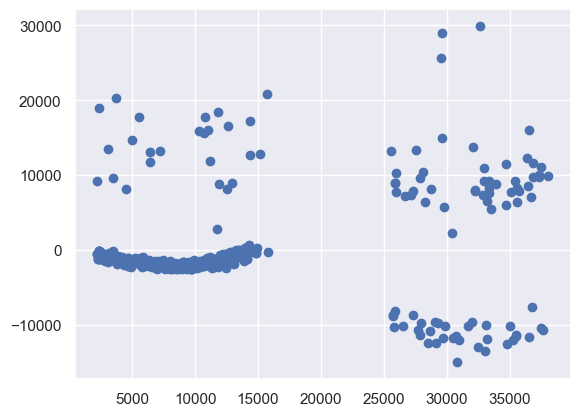

In [185]:
plt.scatter(lasso_pred,residuals)

In [186]:
print(mean_squared_error(Y_test,lasso_pred))
print(mean_absolute_error(Y_test,lasso_pred))
print(np.sqrt(mean_squared_error(Y_test,lasso_pred)))

41382574.56941274
4062.3838839992377
6432.928926190055


In [187]:
score_lasso=r2_score(Y_test,lasso_pred)

In [188]:
score_lasso

0.7439807604197617

In [189]:
1-(1-score_lasso)*len((Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7401016810321823

In [190]:
from sklearn.linear_model import ElasticNet

In [191]:
elastic=ElasticNet()

In [192]:
elastic

ElasticNet()

In [195]:
elastic.fit(X_train,Y_train)

ElasticNet()

In [196]:
print(elastic.coef_)
print(elastic.intercept_)

[2326.51560344  162.56168001  512.74628364 6239.63950185   89.35723085]
13259.865125180557


In [197]:
elastic_pred=elastic.predict(X_test)

In [198]:
elastic_pred

array([ 7161.69800018, 12207.01113689, 12116.44184293,  6584.52961445,
       11956.22188512,  9360.35427997,  7672.20112147,  5997.35809018,
       13468.93807998, 10287.80582918, 12629.79577637,  6259.33200807,
       25857.41354394,  6161.15421119, 11455.5873151 , 13888.87190731,
        8336.49722523,  8945.1781434 , 25175.64038599,  5997.35809018,
       12461.96731565,  6682.11664755, 26445.17583199, 25595.43962605,
       23161.69885733, 12457.93497593,  7172.15731524, 12130.47732119,
        7689.08741188,  7259.28503327,  9192.52581924,  7850.48889725,
        8783.77665803,  8847.00034653, 12473.74274555,  5835.95660481,
       21318.43660154,  9269.19422222, 22812.00645763, 13968.98188621,
        6084.48580822, 22569.90422956, 10280.19732626,  6258.74124429,
       10119.38660467,  9119.43357947, 12714.66344604,  8430.64268239,
        9021.84654638, 12290.10651521,  8775.08963432,  6248.28192923,
       21566.96580495, 28101.81645804,  9870.85740126, 12643.83125463,
      

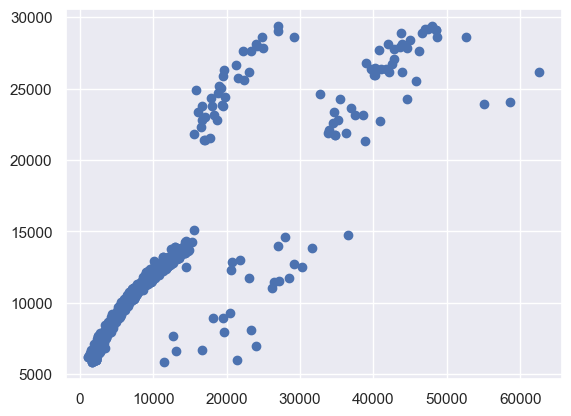

In [199]:
plt.scatter(Y_test,elastic_pred)

In [200]:
residuals_elastic=Y_test-elastic_pred

In [201]:
residuals_elastic

17      -4766.526450
1091     -920.472437
273     -2498.779393
270     -4865.093314
874     -3065.082385
            ...     
468     15189.910299
1232     -748.899193
682     14169.808053
86      15634.492088
164     -4402.449108
Name: charges, Length: 402, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


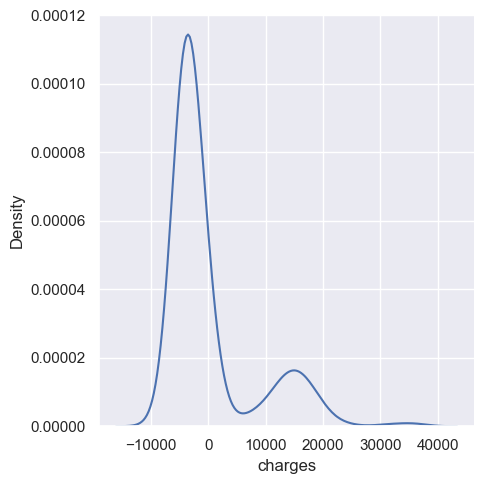

In [203]:
sns.displot(residuals_elastic,kind="kde")

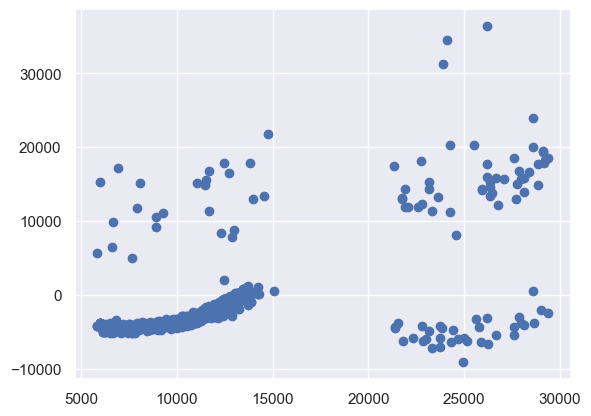

In [204]:
plt.scatter(elastic_pred,residuals_elastic)

In [207]:
print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))

58658401.18959364
5483.139433473125
7658.8772799669305


In [208]:
score_elastic=r2_score(Y_test,elastic_pred)
score_elastic

0.6371013784470436

In [209]:
1-(1-score_elastic)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6325193251446073